In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np
import random

In [71]:
df = pd.read_csv('input1.csv', header=None, names=['x1', 'x2', 'value'], sep=',', error_bad_lines=False)

In [72]:
df['color'] = np.where(df['value'] == 1, 'blue', 'red')
df['x0'] = 1 # to always multiply by bias

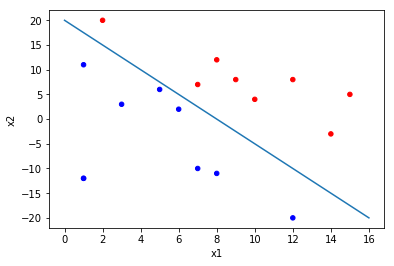

In [92]:
ax = df.plot(kind='scatter', x='x1', y='x2', color=df['color'])
ax.plot(list(reversed(np.linspace(-20, 20, 17)))) # forged

In [7]:
# initialize weights = 0 to start
weights = np.zeros(3)
weights[1] = 1

In [88]:
# create a method for calculating score
def getOutputEstimate(row, weights):
    return (weights[0] * row['x0']) + (row['x1'] * weights[1]) + (row['x2'] * weights[2])

# create a method for easy line plotting
def createLinePlots(df, weights):
    result = []
    for i in range(len(df)):
        result.append(weights[0] + (i * weights[1]) + (i * weights[2]))
    
    print("result: ", result)
    return result

# tells if the current weighs classify point correctly
def isClassifiedCorrectly(row, weights):
    return (row['value'] * getOutputEstimate(row, weights)) > 0

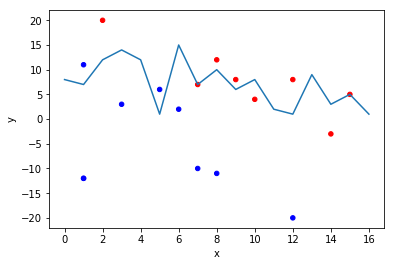

In [9]:
ax = df.plot(kind='scatter', x=0, y=1, color=df['color'])
ax.plot(createLinePlots(df, weights))

In [86]:
#determines the new weights by adding errors
def updateWeights(df, weights):
    for i, row in df.iterrows():
        if not isClassifiedCorrectly(row, weights):
            #print('incorrect classifier', row['x'], row['y'], row['value'])
            for i in range(len(weights)):
                df_map = ['x0', 'x1', 'x2']
                weights[i] += (row[df_map[i]]*row['value'])
        
    return weights

#create helper function for determing convergence
def converged(df, weights):
    for i, row in df.iterrows():
        if not isClassifiedCorrectly(row, weights):
           return False

    return True

weights [ 0.  0.  0.]
result:  [24.0, 21.0, 18.0, 15.0, 12.0, 9.0, 6.0, 3.0, 0.0, -3.0, -6.0, -9.0, -12.0, -15.0, -18.0, -21.0, -24.0]
converge complete:  False [ 24.  -1.  -2.]
result:  [39.0, 32.0, 25.0, 18.0, 11.0, 4.0, -3.0, -10.0, -17.0, -24.0, -31.0, -38.0, -45.0, -52.0, -59.0, -66.0, -73.0]
weights [ 39.  -5.  -2.]
complete:  True


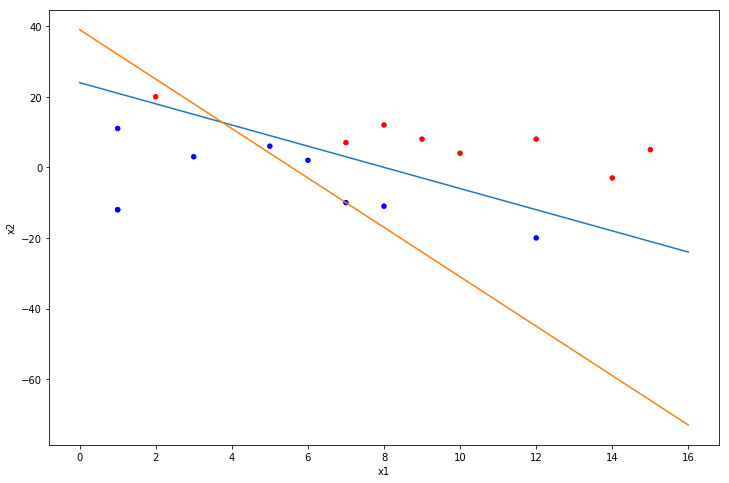

In [114]:
# initialize weights = 0 to start
weights = np.zeros(3)

ax = df.plot(kind='scatter', x=0, y=1, color=df['color'], figsize=(12,8))

converge_complete = False
print("weights", weights)
    
while (not converge_complete):
    ax.plot(createLinePlots(df, weights), label=str(i))
    converge_complete = converged(df, weights)

    updateWeights(df, weights)
    
ax.plot(createLinePlots(df, weights))
print("weights", weights)
print("complete: ", converge_complete)